## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

## 比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [31]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], BN=False):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            if BN: 
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            if BN:
                x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95

params = {'BATCH_SIZE': [2,16,32,128,256],
          'BN': [True, False]}

In [33]:
from sklearn.model_selection import ParameterGrid
results = {}
"""
Write your training loop and record results
"""
for g in ParameterGrid(params):
    print('params: BATCH_SIZE_{}, BN_{}'.format(*g.values()))
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], BN=g['BN'])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=g['BATCH_SIZE'], 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{}-{}".format(*g.values())
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

params: BATCH_SIZE_2, BN_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

50000/50000 [==============================] - 153s 3ms/step - loss: 2.2498 - acc: 0.1598 - val_loss: 2.6644 - val_acc: 0.1749
Epoch 50/50
50000/50000 [==============================] - 153s 3ms/step - loss: 2.2471 - acc: 0.1603 - val_loss: 2.8768 - val_acc: 0.1677
params: BATCH_SIZE_2, BN_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)    

50000/50000 [==============================] - 88s 2ms/step - loss: 1.5729 - acc: 0.4520 - val_loss: 1.6540 - val_acc: 0.4214
params: BATCH_SIZE_16, BN_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)           

50000/50000 [==============================] - 19s 390us/step - loss: 1.1159 - acc: 0.6025 - val_loss: 1.3054 - val_acc: 0.5421
Epoch 49/50
50000/50000 [==============================] - 19s 390us/step - loss: 1.1071 - acc: 0.6078 - val_loss: 1.4280 - val_acc: 0.5074
Epoch 50/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.1060 - acc: 0.6072 - val_loss: 1.3799 - val_acc: 0.5176
params: BATCH_SIZE_16, BN_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (No

Epoch 49/50
50000/50000 [==============================] - 12s 240us/step - loss: 0.5137 - acc: 0.8144 - val_loss: 2.0005 - val_acc: 0.5213
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.5011 - acc: 0.8202 - val_loss: 2.0718 - val_acc: 0.5273
params: BATCH_SIZE_32, BN_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch 

50000/50000 [==============================] - 11s 223us/step - loss: 0.7888 - acc: 0.7154 - val_loss: 1.6451 - val_acc: 0.4920
Epoch 48/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.7948 - acc: 0.7154 - val_loss: 1.6255 - val_acc: 0.5049
Epoch 49/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7803 - acc: 0.7210 - val_loss: 1.6143 - val_acc: 0.5065
Epoch 50/50
50000/50000 [==============================] - 11s 220us/step - loss: 0.7783 - acc: 0.7216 - val_loss: 1.6249 - val_acc: 0.5005
params: BATCH_SIZE_32, BN_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)   

50000/50000 [==============================] - 6s 130us/step - loss: 0.4703 - acc: 0.8311 - val_loss: 1.9171 - val_acc: 0.5359
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.4523 - acc: 0.8382 - val_loss: 1.9664 - val_acc: 0.5287
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.4414 - acc: 0.8409 - val_loss: 1.9693 - val_acc: 0.5305
params: BATCH_SIZE_128, BN_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None,

50000/50000 [==============================] - 4s 83us/step - loss: 0.3043 - acc: 0.8961 - val_loss: 2.4281 - val_acc: 0.4671
Epoch 47/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2923 - acc: 0.9000 - val_loss: 2.3965 - val_acc: 0.4623
Epoch 48/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2729 - acc: 0.9082 - val_loss: 2.3593 - val_acc: 0.4721
Epoch 49/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2708 - acc: 0.9067 - val_loss: 2.5797 - val_acc: 0.4430
Epoch 50/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2564 - acc: 0.9136 - val_loss: 2.6175 - val_acc: 0.4567
params: BATCH_SIZE_128, BN_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)    

50000/50000 [==============================] - 3s 64us/step - loss: 0.6960 - acc: 0.7531 - val_loss: 1.5061 - val_acc: 0.5361
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.6778 - acc: 0.7616 - val_loss: 1.6126 - val_acc: 0.5234
Epoch 49/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6583 - acc: 0.7697 - val_loss: 1.5332 - val_acc: 0.5351
Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6439 - acc: 0.7745 - val_loss: 1.5638 - val_acc: 0.5312
params: BATCH_SIZE_256, BN_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (No

Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.2077 - acc: 0.9415 - val_loss: 2.3647 - val_acc: 0.4762
Epoch 47/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.1942 - acc: 0.9464 - val_loss: 2.3115 - val_acc: 0.4790
Epoch 48/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.1802 - acc: 0.9520 - val_loss: 2.3718 - val_acc: 0.4888
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1711 - acc: 0.9544 - val_loss: 2.3694 - val_acc: 0.4683
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.1670 - acc: 0.9555 - val_loss: 2.5015 - val_acc: 0.4720
params: BATCH_SIZE_256, BN_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1

50000/50000 [==============================] - 2s 49us/step - loss: 0.9000 - acc: 0.6862 - val_loss: 1.3926 - val_acc: 0.5256
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8914 - acc: 0.6899 - val_loss: 1.7107 - val_acc: 0.4642
Epoch 49/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8773 - acc: 0.6939 - val_loss: 1.4243 - val_acc: 0.5243
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8684 - acc: 0.6971 - val_loss: 1.4371 - val_acc: 0.5209


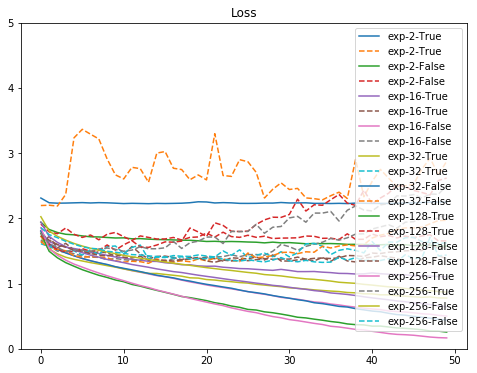

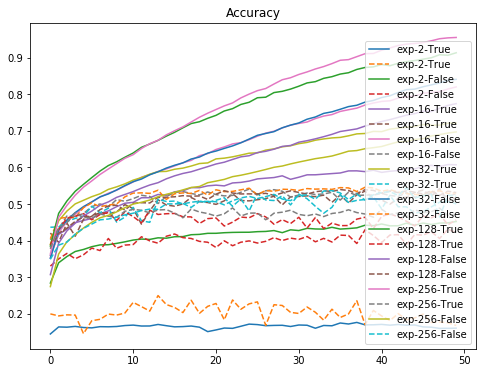

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
## color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()

## 請嘗試將 BN 放在 Activation 之前，並比較訓練結果


In [27]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], before = True):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            if before:
                x = BatchNormalization()(x)
            x = Activation('relu')(x)
            if not before:
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            if before:
                x = BatchNormalization()(x)
            x = Activation('relu')(x)
            if not before:
                x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [28]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = 256

params = {'before': [True, False]}

In [29]:
from sklearn.model_selection import ParameterGrid
results = {}
"""
Write your training loop and record results
"""
for g in ParameterGrid(params):
    print('params: before_{}'.format(*g.values()))
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], before=g['before'])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{}".format(*g.values())
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

params: before_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0

Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0682 - acc: 0.9863 - val_loss: 2.8638 - val_acc: 0.4621
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0627 - acc: 0.9885 - val_loss: 2.9204 - val_acc: 0.4623
Epoch 49/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0560 - acc: 0.9897 - val_loss: 2.9257 - val_acc: 0.4525
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0591 - acc: 0.9893 - val_loss: 2.8436 - val_acc: 0.4552
params: before_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (N

Epoch 43/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2518 - acc: 0.9251 - val_loss: 2.2022 - val_acc: 0.4779
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2418 - acc: 0.9282 - val_loss: 2.3003 - val_acc: 0.4694
Epoch 45/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2291 - acc: 0.9338 - val_loss: 2.3554 - val_acc: 0.4619
Epoch 46/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2199 - acc: 0.9352 - val_loss: 2.3824 - val_acc: 0.4741
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.2096 - acc: 0.9393 - val_loss: 2.3498 - val_acc: 0.4554
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1908 - acc: 0.9457 - val_loss: 2.3139 - val_acc: 0.4600
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.1857 - acc: 0.9484 - val_loss: 2.6662 - val_acc: 0.4532
Epoch 50/50
50000/50000 [=========

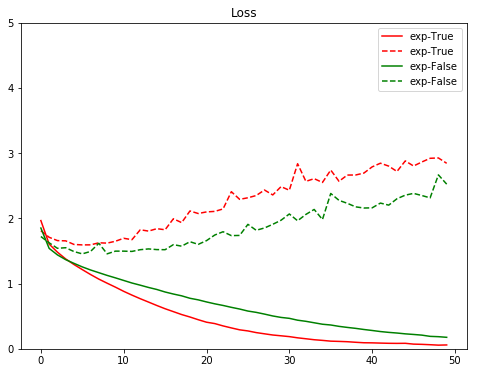

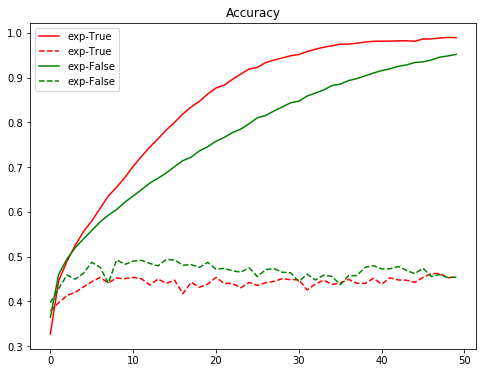

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 請於 BN 放在 Input Layer 後，並比較結果

In [19]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], initial = True):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    if initial:
        x = BatchNormalization()(input_layer)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
                
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = 256

params = {'initial': [True, False]}

In [21]:
from sklearn.model_selection import ParameterGrid
results = {}
"""
Write your training loop and record results
"""
for g in ParameterGrid(params):
    print('params: initial_{}'.format(*g.values()))
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], initial=g['initial'])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{}".format(*g.values())
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

params: initial_True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               

50000/50000 [==============================] - 3s 58us/step - loss: 0.0771 - acc: 0.9834 - val_loss: 2.7975 - val_acc: 0.4516
Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.0629 - acc: 0.9887 - val_loss: 2.7186 - val_acc: 0.4588
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0676 - acc: 0.9862 - val_loss: 2.8625 - val_acc: 0.4516
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.0561 - acc: 0.9900 - val_loss: 2.7263 - val_acc: 0.4654
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.0621 - acc: 0.9876 - val_loss: 2.9668 - val_acc: 0.4613
params: initial_False
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 

Epoch 42/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0849 - acc: 0.9836 - val_loss: 2.7808 - val_acc: 0.4348
Epoch 43/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.0813 - acc: 0.9839 - val_loss: 2.9466 - val_acc: 0.4415
Epoch 44/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.0778 - acc: 0.9846 - val_loss: 2.7696 - val_acc: 0.4536
Epoch 45/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0724 - acc: 0.9865 - val_loss: 2.8334 - val_acc: 0.4505
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0672 - acc: 0.9873 - val_loss: 2.9896 - val_acc: 0.4412
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0681 - acc: 0.9869 - val_loss: 2.8633 - val_acc: 0.4552
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.0595 - acc: 0.9894 - val_loss: 3.0137 - val_acc: 0.4437
Epoch 49/50
50000/50000 [=========

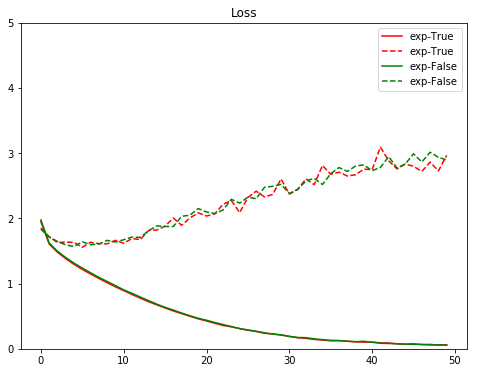

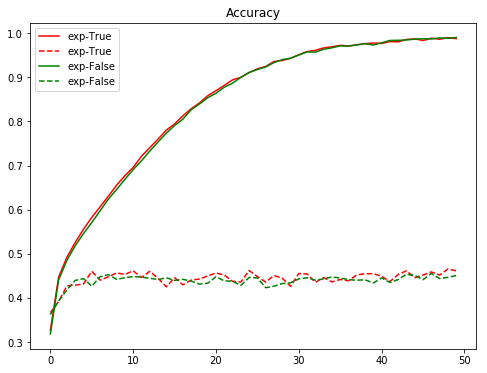

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()